**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, "summary")
txt_fname  = "result.coverage.zscore.final.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [3]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_region, "summary")
txt_fname  = "region.summary.fcc_peak_call.label.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 155926     18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,10038,10405,chr1:10038-10405,Repress,1,0,0,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,10038,10405,chr1:10038-10405,Repress_GCFilter,1,0,0,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress,1,0,0,Silencer,Silencer,0,0,0,0,0,0,0,0


## Arrange table

In [4]:
dat = dat_region_annot_import
table(dat$Type)


         Enhance          Repress Repress_GCFilter 
           43993            65401            46532 

In [5]:
dat = dat_region_annot_import

vec = c("Enhance", "Repress")
dat = dat %>% dplyr::filter(Type %in% vec)

dat_region_annot_subset = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 109394     18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,10038,10405,chr1:10038-10405,Repress,1,0,0,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress,1,0,0,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,17288,17689,chr1:17288-17689,Repress,1,0,0,Silencer,Silencer,0,0,0,0,0,0,0,0


## Merge table

In [6]:
dat = dplyr::inner_join(
    dat_region_annot_subset,
    dat_region_score_fcc,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region"),
    relationship = "many-to-many"
)

dat = dat %>% 
    dplyr::filter(Num_Assay > 1) %>%
    dplyr::distinct()

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 67796    23


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,1,1,0,0,0,0,0,0,0.4510784,CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,1,1,0,0,0,0,0,0,2.3941532,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,1,1,0,0,0,0,0,0,2.4204654,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


## Plot

In [7]:
dat = dat_region_merge
head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,⋯,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,⋯,0,0,0,0,0,0.4510784,CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,⋯,0,0,0,0,0,2.3941532,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,⋯,0,0,0,0,0,2.4204654,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


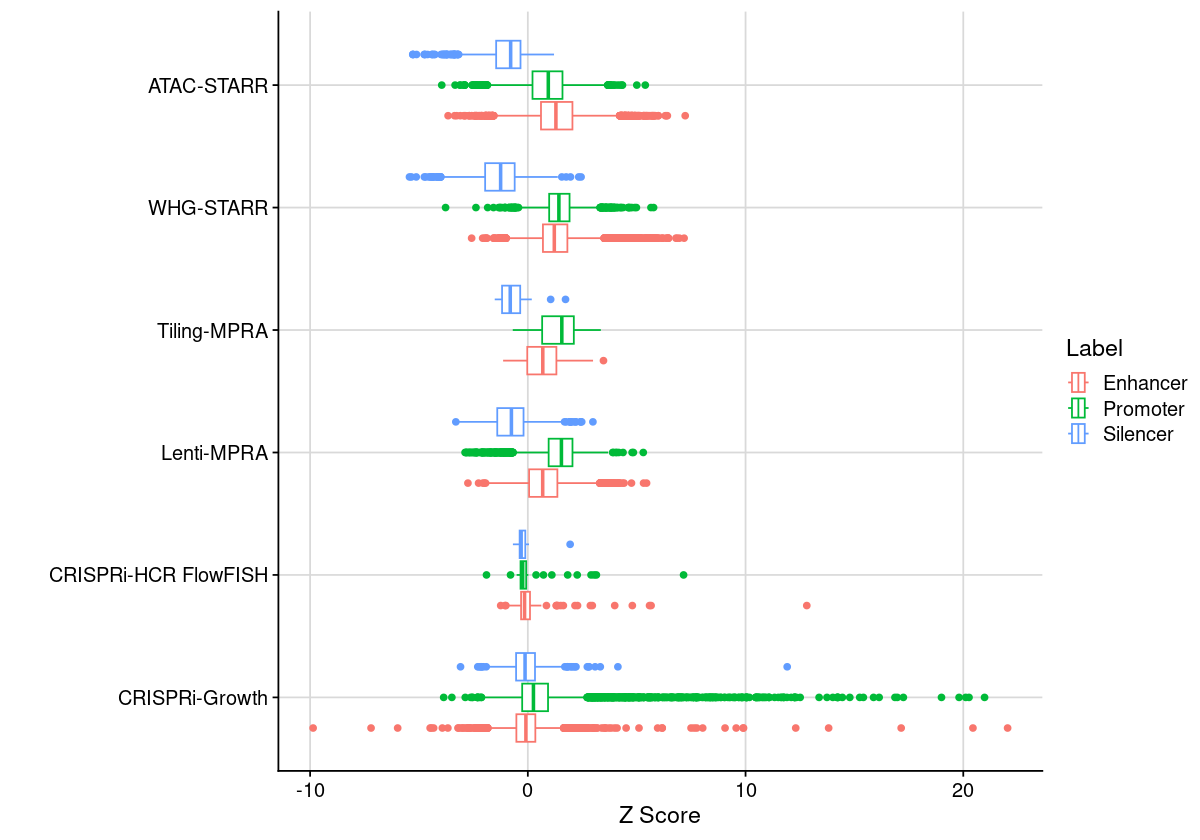

In [8]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA", 
    "CRISPRi-HCR FlowFISH", 
    "CRISPRi-Growth"
)
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec)))

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)

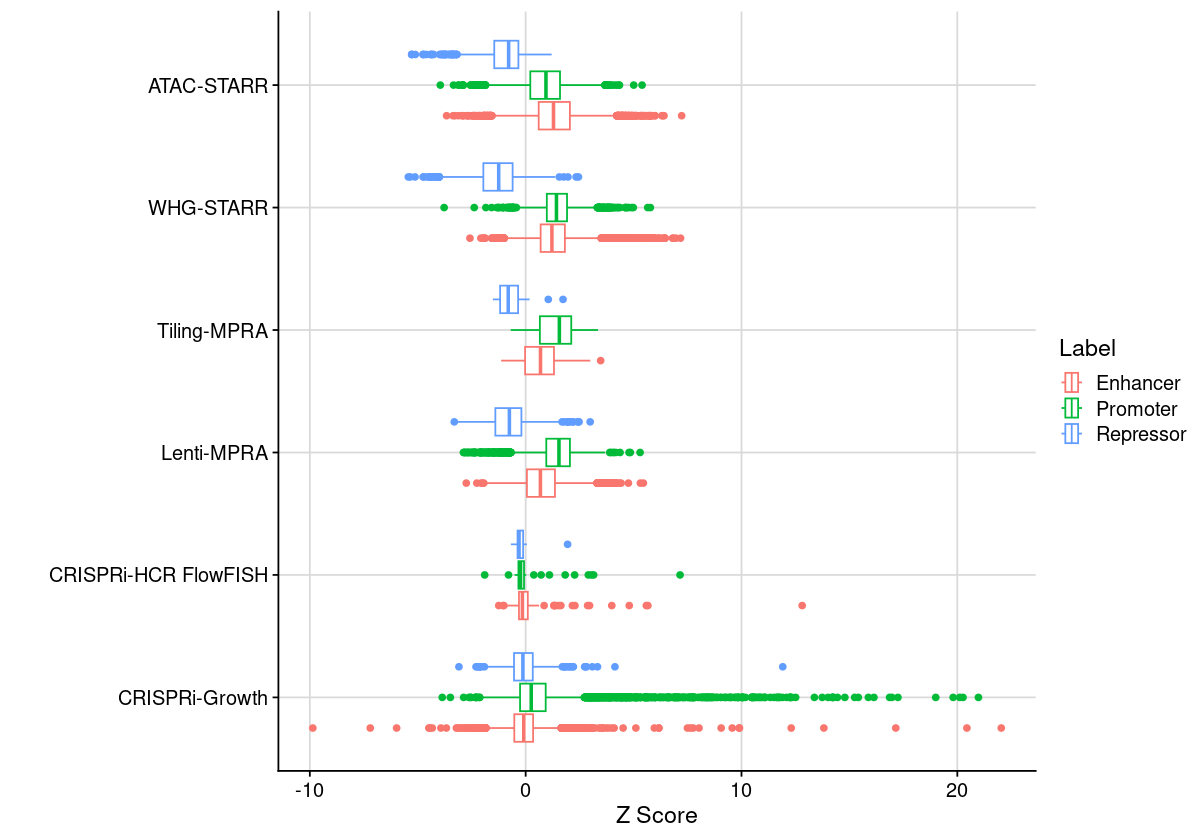

In [7]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA", 
    "CRISPRi-HCR FlowFISH", 
    "CRISPRi-Growth"
)
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec)))

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)

In [19]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA"
)
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::filter(Assay_Label %in% vec) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec)))
head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,⋯,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,⋯,0,0,0,0,2.394153,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,Enhancer
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,⋯,0,0,0,0,2.420465,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR,Enhancer
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,⋯,0,0,0,0,2.873101,STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WHG-STARR,Enhancer


In [74]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::filter(Assay_Type == "TMPRA")

dat %>% group_by(Label) %>%
  summarise(
    count = n(),
    median = median(Score, na.rm = TRUE),
    IQR = IQR(Score, na.rm = TRUE)
  )


Label,count,median,IQR
<chr>,<int>,<dbl>,<dbl>
Enhancer,188,0.6873771,1.3377437
Promoter,57,1.5610063,1.4545402
Repressor,22,-0.8075320,0.8333205


In [75]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::filter(Assay_Type == "TMPRA")

lst = split(dat$Score, dat$Label)
vec_enh = lst[["Enhancer"]]
vec_pro = lst[["Promoter"]]
vec_rep = lst[["Repressor"]]

res_enh_pro = wilcox.test(vec_enh, vec_pro, paired=FALSE)
res_enh_rep = wilcox.test(vec_enh, vec_rep, paired=FALSE)
res_pro_rep = wilcox.test(vec_pro, vec_rep, paired=FALSE)

In [79]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::filter(Assay_Type == "TMPRA")
pairwise.wilcox.test(dat$Score, dat$Label, p.adj = "bonf", paired = FALSE)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  dat$Score and dat$Label 

          Enhancer Promoter
Promoter  1.3e-05  -       
Repressor 1.9e-08  5.6e-09 

P value adjustment method: bonferroni 

In [80]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::filter(Assay_Type == "ASTARR")
pairwise.wilcox.test(dat$Score, dat$Label, p.adj = "bonf", paired = FALSE)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  dat$Score and dat$Label 

          Enhancer Promoter
Promoter  <2e-16   -       
Repressor <2e-16   <2e-16  

P value adjustment method: bonferroni 

In [83]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::filter(Assay_Type == "WSTARR")
pairwise.wilcox.test(dat$Score, dat$Label, p.adj = "bonf", paired = FALSE)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  dat$Score and dat$Label 

          Enhancer Promoter
Promoter  <2e-16   -       
Repressor 1        1       

P value adjustment method: bonferroni 

In [76]:
res = res_enh_pro
print(res)


	Wilcoxon rank sum test with continuity correction

data:  vec_enh and vec_pro
W = 3204, p-value = 4.335e-06
alternative hypothesis: true location shift is not equal to 0



In [77]:
res = res_enh_rep
print(res)


	Wilcoxon rank sum test with continuity correction

data:  vec_enh and vec_rep
W = 3635, p-value = 6.29e-09
alternative hypothesis: true location shift is not equal to 0



In [78]:
res = res_pro_rep
print(res)


	Wilcoxon rank sum test with continuity correction

data:  vec_pro and vec_rep
W = 1177, p-value = 1.856e-09
alternative hypothesis: true location shift is not equal to 0



In [34]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>% 
    dplyr::filter(Assay_Type == "WSTARR")

In [42]:
vec = c("Enhancer", "Promoter")
tmp = dat %>% dplyr::filter(Label %in% vec)
res = wilcox.test(Score ~ Label, data=tmp)
print(res)


	Wilcoxon rank sum test with continuity correction

data:  Score by Label
W = 25165766, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



In [43]:
tmp %>% group_by(Label) %>% summarize(Score = median(Score))

Label,Score
<chr>,<dbl>
Enhancer,1.215953
Promoter,1.426637


In [41]:
table(tmp$Label)


Enhancer Promoter 
   11601     5083 

In [36]:
vec = c("Enhancer", "Repressor")
tmp = dat %>% dplyr::filter(Label %in% vec)
res = wilcox.test(Score ~ Label, data=tmp)
print(res)


	Wilcoxon rank sum test with continuity correction

data:  Score by Label
W = 18597300, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



In [37]:
vec = c("Promoter", "Repressor")
tmp = dat %>% dplyr::filter(Label %in% vec)
res = wilcox.test(Score ~ Label, data=tmp)
print(res)


	Wilcoxon rank sum test with continuity correction

data:  Score by Label
W = 8238014, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



In [24]:
lst = split(dat$Score, dat$Label)
vec_enh = lst[["Enhancer"]]
vec_pro = lst[["Promoter"]]
vec_rep = lst[["Repressor"]]

res_enh_pro = wilcox.test(vec_enh ~ vec_pro)
res_enh_rep = wilcox.test(vec_enh ~ vec_rep, data=mtcars)
res_pro_rep = wilcox.test(vec_pro ~ vec_rep, data=mtcars)

ERROR: Error in model.frame.default(formula = vec_enh ~ vec_pro, data = mtcars): variable lengths differ (found for 'vec_pro')


## Plot

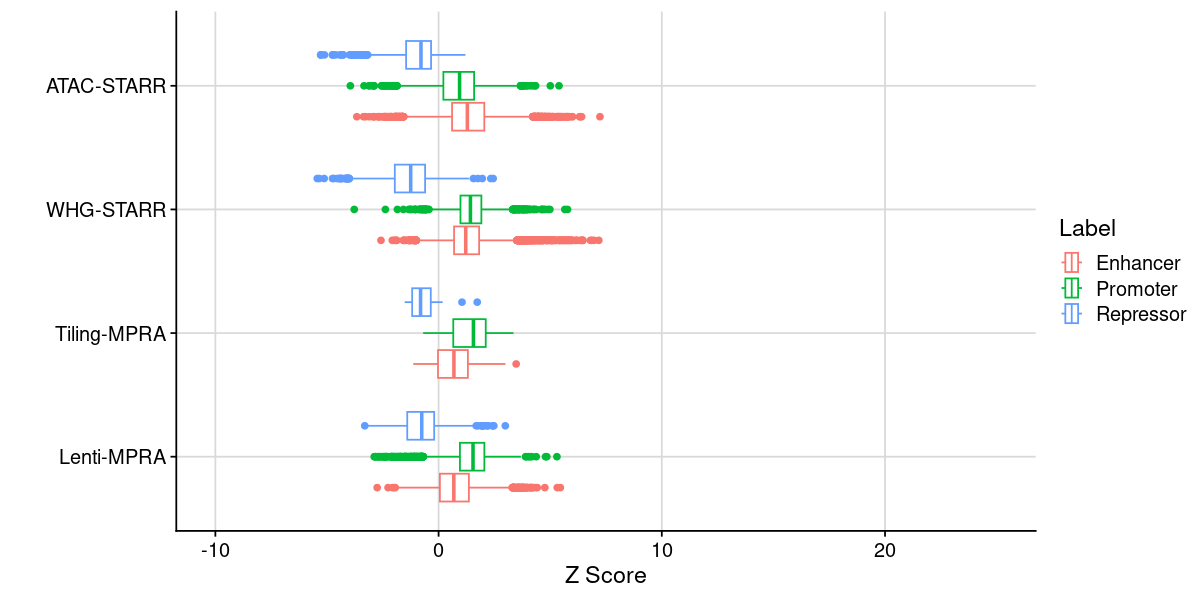

In [90]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA"
)
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::filter(Assay_Label %in% vec) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec)))

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

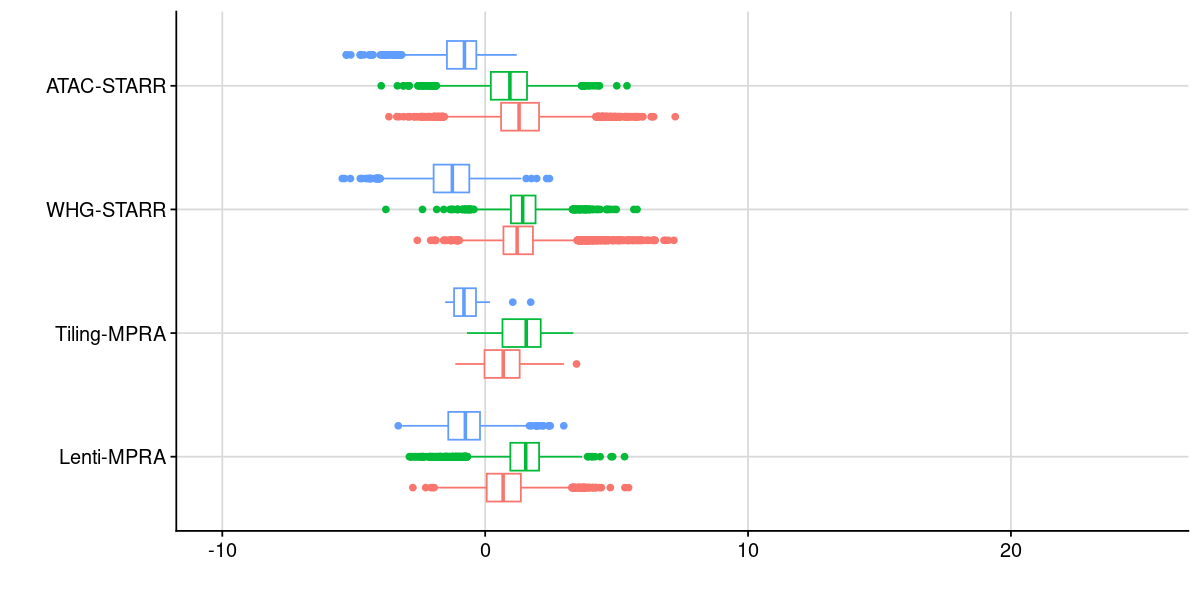

In [101]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA"
)
dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::filter(Assay_Label %in% vec) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec)))

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "", y = "") +
    theme_cowplot() +
    background_grid() + 
    theme(legend.position = "none")

gpt1 = gpt
options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

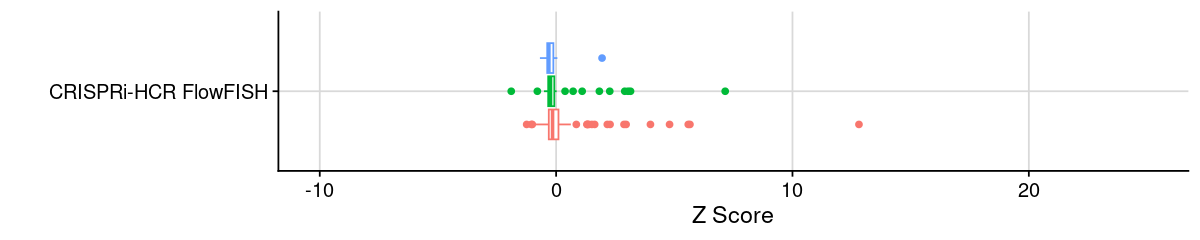

In [92]:
dat = dat_region_merge
vec = c("CRISPRi-HCR FlowFISH")

dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::filter(Assay_Label %in% vec) 
gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()+ 
    theme(legend.position = "none")

options(repr.plot.width=10, repr.plot.height=2)
print(gpt)

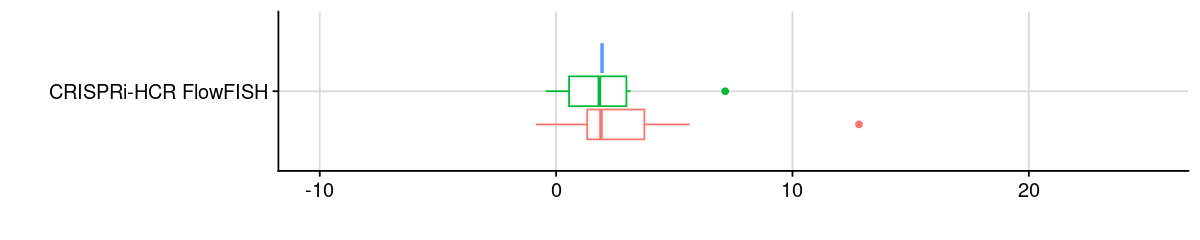

In [100]:
dat = dat_region_merge
vec = c("CRISPRi-HCR FlowFISH")

dat = dat %>% 
    dplyr::mutate(Label = Label2) %>%
    dplyr::filter(Assay_Label %in% vec) %>%
    dplyr::filter(Signif_CRISPR_HCRFF == 1)
gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "", y = "") +
    theme_cowplot() +
    background_grid()+ 
    theme(legend.position = "none")

gpt2 = gpt
options(repr.plot.width=10, repr.plot.height=2)
print(gpt)

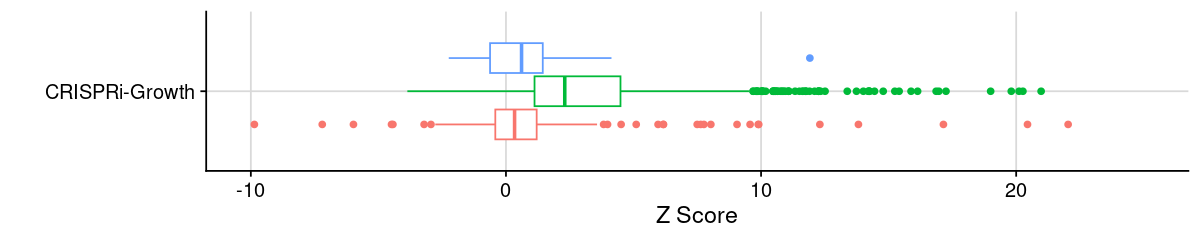

In [105]:
dat = dat_region_merge
vec = c("CRISPRi-Growth")

dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec) %>%
    dplyr::filter(Signif_CRISPR_Growth == 1)

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label2)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()+ 
    theme(legend.position = "none")

gpt3 = gpt
options(repr.plot.width=10, repr.plot.height=2)
print(gpt)

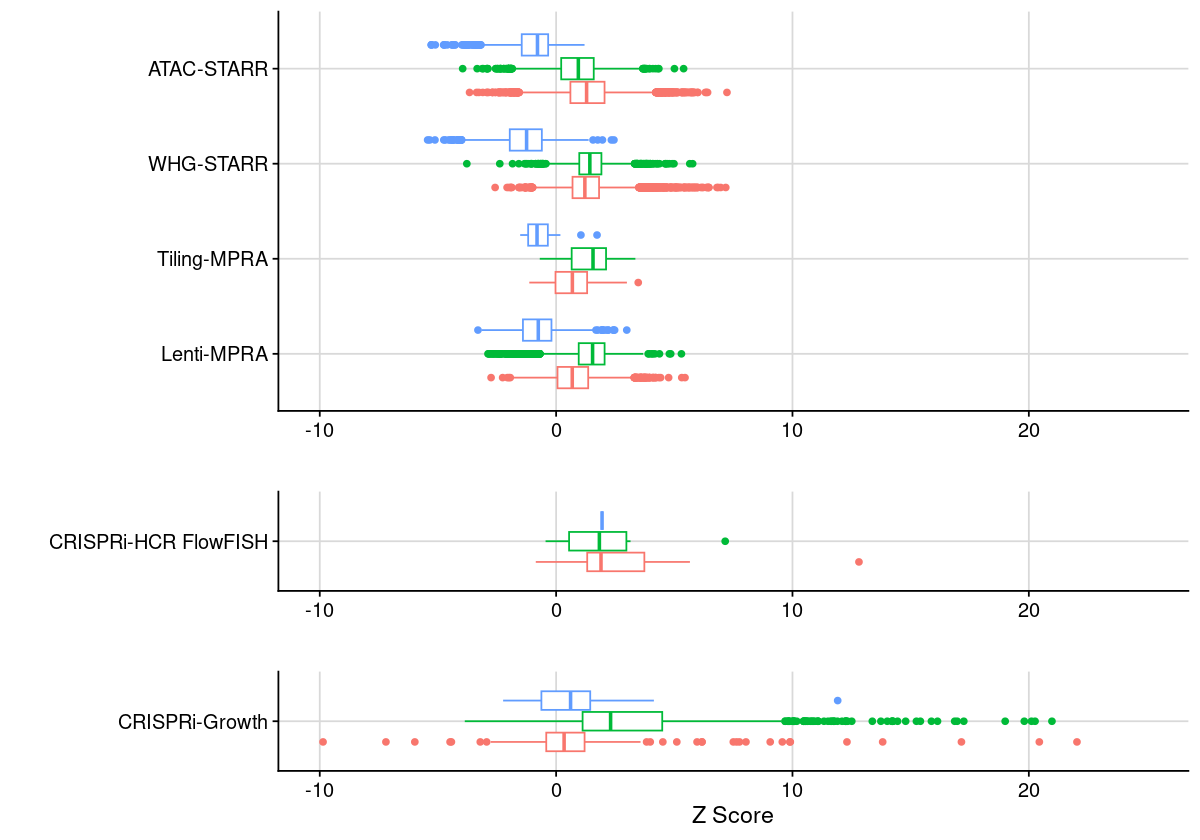

In [106]:
options(repr.plot.width=10, repr.plot.height=7)
plot_grid(
    plotlist = list(gpt1, gpt2, gpt3), ncol = 1, align = "v",
    rel_heights = c(4, 1.5, 1.5)
)


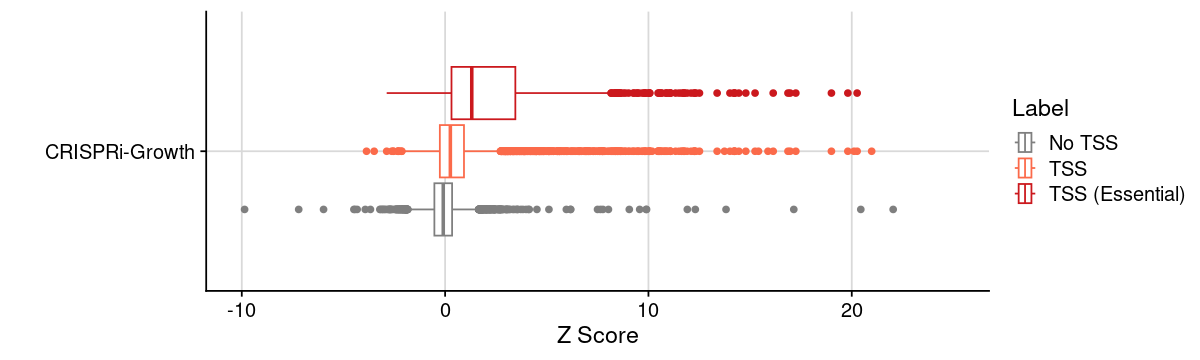

In [108]:
dat = dat_region_merge
vec = c("CRISPRi-Growth")

dat  = dat %>% dplyr::filter(Assay_Label %in% vec)
dat1 = dat %>% 
    dplyr::filter(TSS_Total == 0) %>% 
    dplyr::mutate(Label = "No TSS")
dat2 = dat %>% 
    dplyr::filter(TSS_Total == 1) %>% 
    dplyr::mutate(Label = "TSS")
dat3 = dat %>% 
    dplyr::filter(TSS_Essential == 1) %>% 
    dplyr::mutate(Label = "TSS (Essential)")
dat  = bind_rows(dat1, dat2, dat3)

vec = c(
    "No TSS" = "grey50",
    "TSS"    = "#fb6a4a",
    "TSS (Essential)" = "#cb181d"
)
theme_color = scale_color_manual(values = vec)

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.width=10, repr.plot.height=3)
print(gpt)

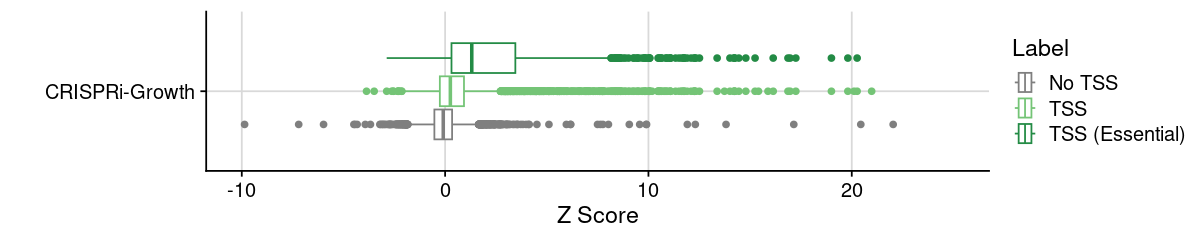

In [54]:
dat = dat_region_merge
vec = c("CRISPRi-Growth")

dat  = dat %>% dplyr::filter(Assay_Label %in% vec)
dat1 = dat %>% 
    dplyr::filter(TSS_Total == 0) %>% 
    dplyr::mutate(Label = "No TSS")
dat2 = dat %>% 
    dplyr::filter(TSS_Total == 1) %>% 
    dplyr::mutate(Label = "TSS")
dat3 = dat %>% 
    dplyr::filter(TSS_Essential == 1) %>% 
    dplyr::mutate(Label = "TSS (Essential)")
dat  = bind_rows(dat1, dat2, dat3)

vec = c(
    "No TSS" = "grey50",
    "TSS"    = "#74c476",
    "TSS (Essential)" = "#238b45"
)
theme_color = scale_color_manual(values = vec)

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    xlim(-10, 25) +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.width=10, repr.plot.height=2)
print(gpt)

In [7]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(Signif_CRISPR_HCRFF == 1)

dat_region_annot_chcrff = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 55 18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr11,5249957,5250351,chr11:5249957-5250351,Enhancer,2,0,0,Enhancer,Enhancer,1,1,1,0,1,0,1,0
chr11,5254200,5254444,chr11:5254200-5254444,Repressor,1,0,0,Repressor,Repressor,1,0,1,0,1,0,1,0
chr11,5269503,5270633,chr11:5269503-5270633,Enhancer,1,1,0,TSS:Enhancer,Promoter,1,1,1,0,1,0,1,0


In [8]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(Signif_CRISPR_Growth == 1)

dat_region_annot_cgrowth = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 4279   18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,605104,605675,chr1:605104-605675,Enhancer,1,0,0,Enhancer,Enhancer,1,1,0,0,1,1,0,0
chr1,826796,828040,chr1:826796-828040,Enhancer,1,1,0,TSS:Enhancer,Promoter,1,1,0,0,1,1,0,0
chr1,826796,828040,chr1:826796-828040,Repressor,1,1,0,TSS:Repressor,Promoter,1,1,0,0,1,1,0,0


In [ ]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(TSS_Total != 1)

dat_region_annot_tss_total = dat
print(dim(dat))
fun_display_table(head(dat, 3))

In [9]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(TSS_Total == 1)

dat_region_annot_tss_total = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 12268    18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,28934,29499,chr1:28934-29499,Repressor,1,1,0,TSS:Repressor,Promoter,0,0,0,0,0,0,0,0
chr1,826796,828040,chr1:826796-828040,Enhancer,1,1,0,TSS:Enhancer,Promoter,1,1,0,0,1,1,0,0
chr1,826796,828040,chr1:826796-828040,Repressor,1,1,0,TSS:Repressor,Promoter,1,1,0,0,1,1,0,0


In [10]:
dat = dat_region_annot_subset
dat = dat %>% dplyr::filter(TSS_Essential == 1)

dat_region_annot_tss_essen = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1439   18


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,1406826,1408156,chr1:1406826-1408156,Enhancer,2,1,1,TSS:Enhancer,Promoter,1,1,0,0,0,0,0,0
chr1,1406826,1408156,chr1:1406826-1408156,Repressor,1,1,1,TSS:Repressor,Promoter,1,1,0,0,0,0,0,0
chr1,1573998,1575422,chr1:1573998-1575422,Enhancer,2,1,1,TSS:Enhancer,Promoter,1,1,0,0,1,1,0,0


In [13]:
dat = dat_region_annot
table(dat$Type)


 Enhancer Repressor 
    47686     74542 

In [14]:
dat = dat_region_annot
table(dat$Label)


     Enhancer     Repressor  TSS:Enhancer TSS:Repressor 
        39052         67767          8634          6775 

In [15]:
dat = dat_region_annot
table(dat$Label2)


 Enhancer  Promoter Repressor 
    39052     15409     67767 

## Merge

In [16]:
dat = dplyr::left_join(
    dat_region_annot,
    dat_region_score,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region"),
    relationship = "many-to-many"
)

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 382225     15


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS,CRISPR,Label,Label2,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr1,10038,10405,chr1:10038-10405,Repressor,1,0,0,Repressor,Repressor,-3.557362,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,16025,16338,chr1:16025-16338,Repressor,1,0,0,Repressor,Repressor,-2.137631,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,17288,17689,chr1:17288-17689,Repressor,1,0,0,Repressor,Repressor,-2.123704,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


In [28]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA", 
    "CRISPRi-HCR FlowFISH", 
    "CRISPRi-Growth"
)

dat = dat %>% 
    dplyr::filter(Num_Assay > 1) %>%
    dplyr::distinct() %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec)))

dat_region_merge_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 83986    15


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS,CRISPR,Label,Label2,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,0.4510784,CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,2.3941532,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA
chr1,778233,779389,chr1:778233-779389,Enhancer,3,0,0,Enhancer,Enhancer,2.4204654,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


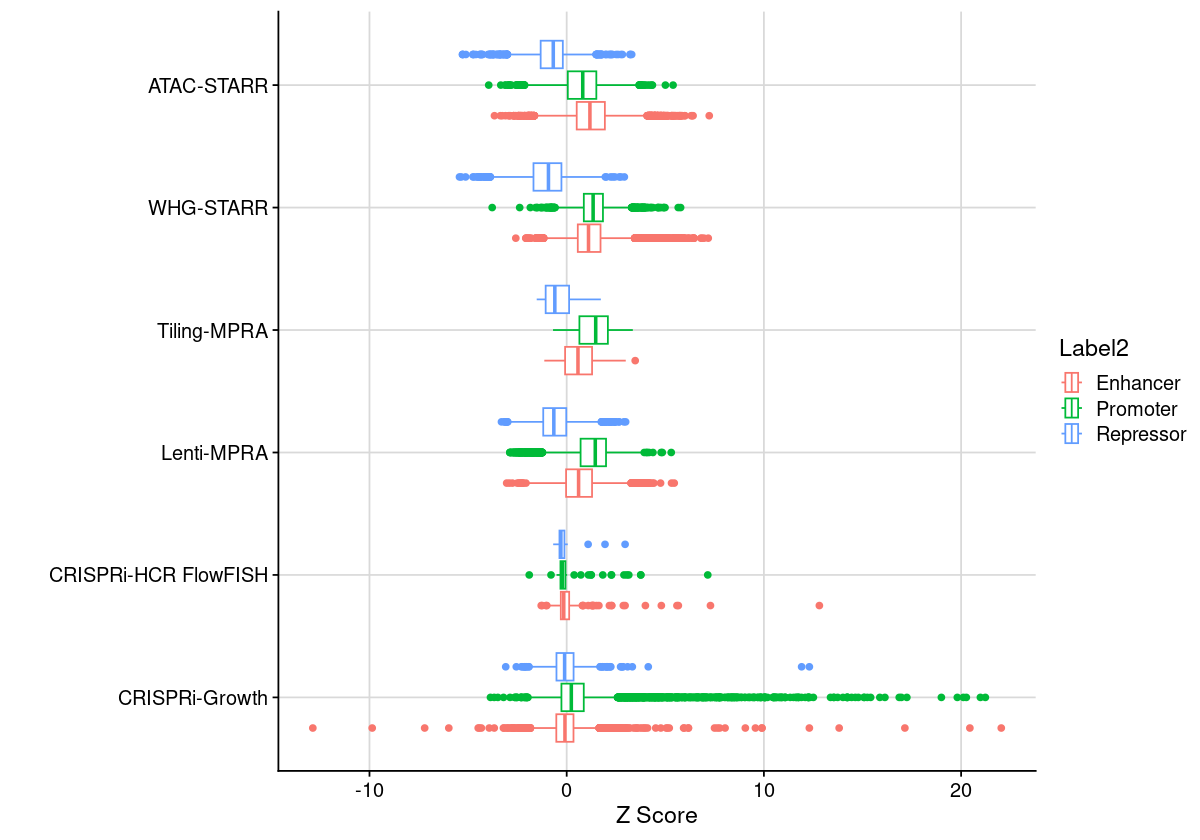

In [29]:
dat = dat_region_merge_arrange
gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label2)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)

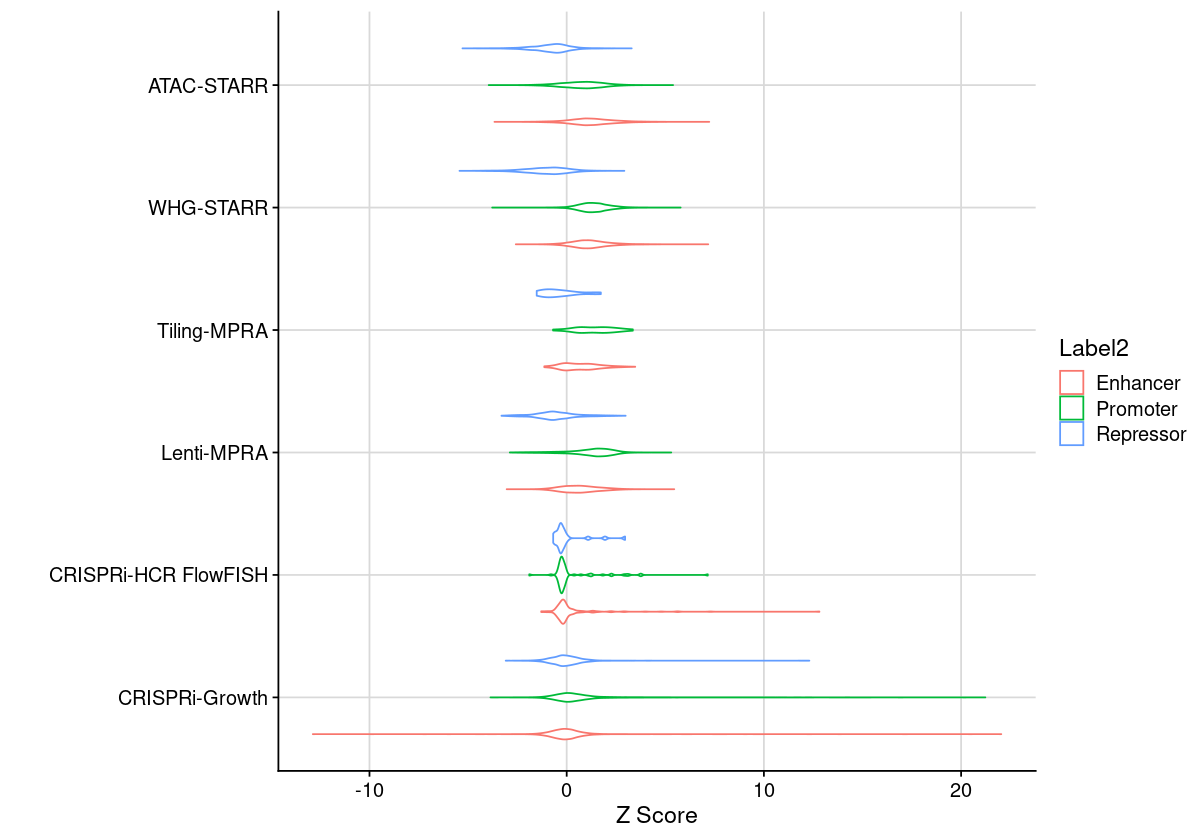

In [30]:
dat = dat_region_merge_arrange
gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label2)) +
    geom_violin() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)